# Deep learning model for Respiratory Sound

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Load various imports 
from datetime import datetime
from os import listdir
from os.path import isfile, join

import librosa
import librosa.display

import numpy as np
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, GlobalAveragePooling2D
#from keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Read audio file 

In [16]:
mypath = "modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/"
filenames = [f for f in listdir(mypath) if (isfile(join(mypath, f)) and f.endswith('.wav'))] 

In [17]:
p_id_in_file = [] # patient IDs corresponding to each file
for name in filenames:
    p_id_in_file.append(int(name[:3]))

p_id_in_file = np.array(p_id_in_file) 

In [18]:
filepaths = [join(mypath, f) for f in filenames] # full paths of files

In [19]:
# patient diagnosis file
p_diag = pd.read_csv("modified_data/Respiratory_sound_database/Respiratory_Sound_Database/patient_diagnosis.csv",header=None)
p_diag.head()

,0,1
0,101,URTI
1,102,Healthy
2,103,Asthma
3,104,COPD
4,105,URTI


In [20]:
#no of paients in each disease 
plt.figure(figsize=(10,5))
sns.countplot(p_diag[1])

ValueError: could not convert string to float: 'URTI'

<Figure size 1000x500 with 0 Axes>

In [11]:
labels = np.array([p_diag[p_diag[0] == x][1].values[0] for x in p_id_in_file]) # labels for audio files

# Extract Features by MFCC

In [12]:
max_pad_len = 862 # to make the length of all MFCC equal

def extract_features(file_name):
    """
    This function takes in the path for an audio file as a string, loads it, and returns the MFCC
    of the audio"""
   
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast', duration=20) 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        pad_width = max_pad_len - mfccs.shape[1]
        mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
        
    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        return None 
     
    return mfccs

In [13]:
features = [] 

# Iterate through each sound file and extract the features
for file_name in filepaths:
    data = extract_features(file_name)
    features.append(data)

print('Finished feature extraction from ', len(features), ' files')
features = np.array(features)

Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/101_1b1_Al_sc_Meditron.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/101_1b1_Pr_sc_Meditron.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/102_1b1_Ar_sc_Meditron.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/103_2b2_Ar_mc_LittC2SE.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/104_1b1_Al_sc_Litt3200.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/104_1b1_Ar_sc_Litt3200.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Datab

Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/112_1b1_Lr_sc_Meditron.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/112_1p1_Ll_sc_Litt3200.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/112_1p1_Pl_sc_Litt3200.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/112_1p1_Pr_sc_Litt3200.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/113_1b1_Al_sc_Litt3200.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/113_1b1_Ar_sc_Litt3200.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Datab

Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/130_1p2_Al_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/130_1p2_Ar_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/130_1p2_Ll_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/130_1p2_Lr_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/130_1p2_Pl_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/130_1p2_Pr_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Datab

Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/130_3p2_Pr_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/130_3p2_Tc_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/130_3p3_Al_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/130_3p3_Pl_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/130_3p3_Pr_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/130_3p3_Tc_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Datab

Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/138_1p2_Ll_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/138_1p2_Lr_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/138_1p2_Pl_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/138_1p2_Pr_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/138_1p2_Tc_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/138_1p3_Al_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Datab

Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/146_2b4_Al_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/146_2b4_Ar_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/146_2b4_Ll_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/146_2b4_Lr_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/146_2b4_Pr_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/146_8p3_Al_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Datab

Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/151_3p2_Lr_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/151_3p2_Pl_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/151_3p2_Pr_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/151_3p2_Tc_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/151_3p3_Ll_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/152_1b1_Al_sc_Meditron.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Datab

Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/158_1p2_Al_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/158_1p2_Ar_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/158_1p2_Ll_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/158_1p2_Lr_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/158_1p2_Pl_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/158_1p2_Pr_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Datab

Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/162_1b2_Ll_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/162_1b2_Lr_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/162_1b2_Pl_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/162_1b2_Pr_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/162_1b2_Tc_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/162_2b2_Al_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Datab

Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/170_1b3_Ar_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/170_1b3_Ll_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/170_1b3_Lr_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/170_1b3_Pl_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/170_1b3_Pr_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/170_1b3_Tc_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Datab

Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/174_1p3_Lr_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/174_1p3_Pl_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/174_1p3_Pr_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/174_1p3_Tc_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/174_1p4_Ar_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/174_1p4_Ll_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Datab

Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/177_2b4_Lr_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/177_2b4_Pl_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/177_2b4_Pr_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/177_2b4_Tc_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/178_1b2_Al_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/178_1b2_Ar_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Datab

Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/186_2b3_Al_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/186_2b3_Ar_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/186_2b3_Lr_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/186_2b3_Pl_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/186_2b3_Pr_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/186_2b3_Tc_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Datab

Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/196_1b1_Pr_sc_Meditron.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/197_1b1_Al_sc_Meditron.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/197_1b1_Tc_sc_Meditron.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/198_1b5_Al_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/198_1b5_Ar_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/198_1b5_Ll_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Datab

Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/203_1p2_Tc_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/203_1p3_Al_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/203_1p3_Ar_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/203_1p3_Pl_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/203_1p3_Pr_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/203_1p3_Tc_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Datab

Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/207_2b3_Pl_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/207_2b3_Pr_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/207_2b3_Tc_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/207_2b4_Al_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/207_2b4_Ar_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/207_2b4_Pl_mc_AKGC417L.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Datab

Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/218_1b1_Ar_sc_Meditron.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/218_1b1_Lr_sc_Meditron.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/218_1b1_Pl_sc_Meditron.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/218_1b1_Pr_sc_Meditron.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/218_1p1_Ar_sc_Litt3200.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/218_1p1_Pl_sc_Litt3200.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Datab

Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/242_1b1_Prm_sc_LittC2SE.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/243_1b1_Pru_sc_LittC2SE.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/244_1b1_Prm_sc_LittC2SE.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/245_1b1_Pm_sc_LittC2SE.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/246_1b1_Pu_sc_LittC2SE.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/247_1b1_Pr_sc_LittC2SE.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Da

Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/300_1b1_Pl_sc_LittC2SE.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/301_1b1_Pl_sc_LittC2SE.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/302_1b1_Pl_sc_LittC2SE.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/303_1b1_Pl_sc_LittC2SE.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/304_1b1_Pl_sc_LittC2SE.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/305_1b1_Pl_sc_LittC2SE.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Datab

Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/354_1b1_Pl_sc_LittC2SE.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/355_1b1_Pl_sc_LittC2SE.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/356_1b1_Pl_sc_LittC2SE.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/357_1b1_Pl_sc_LittC2SE.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/358_1b1_Pl_sc_LittC2SE.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/359_1b1_Pl_sc_LittC2SE.wav
Error encountered while parsing file:  modified_data/Respiratory_Sound_Datab

# Visiualisation of MFCC

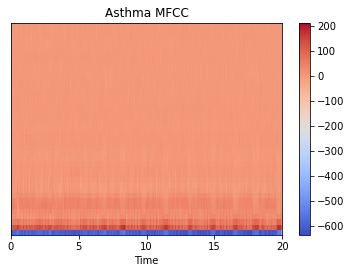

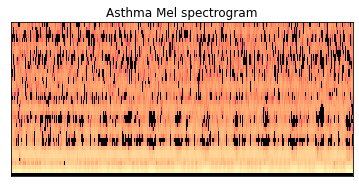

In [10]:
# plot an MFCC
plt.figure(figsize=(10, 7))
plt.subplot(2,2,1)
librosa.display.specshow(features[2], x_axis='time')
plt.colorbar()
plt.title('Asthma MFCC')
plt.tight_layout()

#plot Mel spectrogram
plt.figure(figsize=(10, 5))
plt.subplot(2,2,2)
librosa.display.specshow(librosa.power_to_db(features[2], ref=np.max))
plt.title('Asthma Mel spectrogram')
plt.tight_layout()

In [11]:
import IPython.display as ipd
filepath_Asthma = "modified_dataFINAL/modified_data/Respiratory_sound_database/Respiratory_Sound_Database/audio_and_txt_files/235_1b1_Prm_sc_LittC2SE.wav"
filepath_Bronchiectasis = "modified_dataFINAL/modified_data/Respiratory_sound_database/Respiratory_Sound_Database/audio_and_txt_files/111_1b2_Tc_sc_Meditron.wav"
filepath_COPD = "modified_dataFINAL/modified_data/Respiratory_sound_database/Respiratory_Sound_Database/audio_and_txt_files/104_1b1_Ar_sc_Litt3200.wav"
filepath_Bronchiolitis = "modified_dataFINAL/modified_data/Respiratory_sound_database/Respiratory_Sound_Database/audio_and_txt_files/149_1b1_Lr_sc_Meditron.wav"
filepath_Healthy = "modified_dataFINAL/modified_data/Respiratory_sound_database/Respiratory_Sound_Database/audio_and_txt_files/125_1b1_Tc_sc_Meditron.wav"
filepath_Pneumonia = "modified_dataFINAL/modified_data/Respiratory_sound_database/Respiratory_Sound_Database/audio_and_txt_files/122_2b2_Ar_mc_LittC2SE.wav"
filepath_URTI = "modified_dataFINAL/modified_data/Respiratory_sound_database/Respiratory_Sound_Database/audio_and_txt_files/105_1b1_Tc_sc_Meditron.wav"
#ipd.Audio(filepath)

# Visualize Audios of each disease

[Text(0.5, 1.0, 'time series data of URTI')]

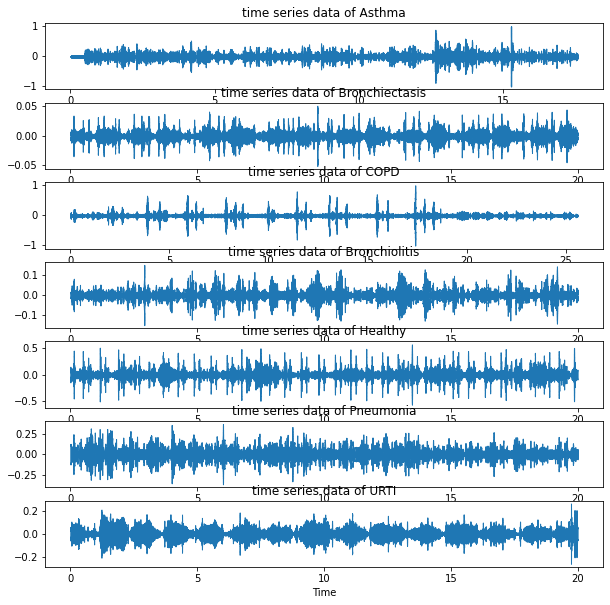

In [12]:
import librosa
import librosa.display

fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(10, 10))
sr_new =  16000# resample 16 kHz
x1, sr = librosa.load(filepath_Asthma , sr=sr_new, duration=20)
#plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x1,  sr=sr_new, ax=ax[0])
ax[0].set(title='time series data of Asthma')

x2, sr = librosa.load(filepath_Bronchiectasis, sr=sr_new)
#plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x2, sr=sr_new, ax=ax[1])
ax[1].set(title='time series data of Bronchiectasis')

x3, sr = librosa.load(filepath_COPD, sr=sr_new)
#plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x3, sr=sr_new, ax=ax[2])
ax[2].set(title='time series data of COPD')

x4, sr = librosa.load(filepath_Bronchiolitis, sr=sr_new)
#plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x4, sr=sr_new, ax=ax[3])
ax[3].set(title='time series data of Bronchiolitis')

x5, sr = librosa.load(filepath_Healthy, sr=sr_new)
#plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x5, sr=sr_new, ax=ax[4])
ax[4].set(title='time series data of Healthy')

x6, sr = librosa.load(filepath_Pneumonia, sr=sr_new)
#plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x6, sr=sr_new, ax=ax[5])
ax[5].set(title='time series data of Pneumonia')

x7, sr = librosa.load(filepath_URTI, sr=sr_new)
#plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x7, sr=sr_new, ax=ax[6])
ax[6].set(title='time series data of URTI')

# Extract features by Spectrogtam

In [13]:
def extract_features2(file_name):
    """
    This function takes in the path for an audio file as a string, loads it, and returns the MFCC
    of the audio"""
   
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast', duration=20) 
        X = librosa.stft(audio)
        Xdb = librosa.amplitude_to_db(abs(X))
        pad_width = max_pad_len - Xdb.shape[1]
        spectrogram = np.pad(Xdb, pad_width=((0, 0), (0, pad_width)), mode='constant')
        
    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        return None 
     
    return spectrogram

# Visualise Audios of each disease by spectrogram

[Text(0.5, 1.0, 'Spectrogram of URTI')]

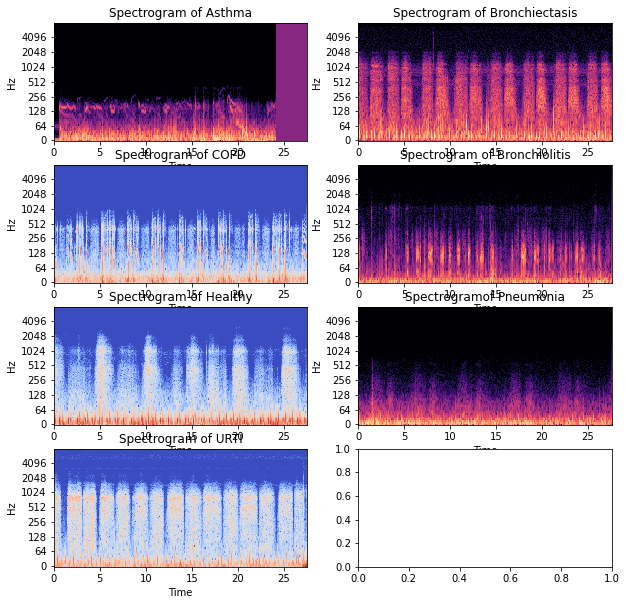

In [14]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(10, 10))

librosa.display.specshow(extract_features2(filepath_Asthma), x_axis='time',
                         y_axis='log', sr=sr_new,ax=ax[0,0])
ax[0,0].set(title='Spectrogram of Asthma')

librosa.display.specshow(extract_features2(filepath_Bronchiectasis), x_axis='time',
                         y_axis='log', sr=sr_new, ax=ax[0,1])
ax[0,1].set(title='Spectrogram of Bronchiectasis')

librosa.display.specshow(extract_features2(filepath_COPD), x_axis='time',
                         y_axis='log', sr=sr_new,ax=ax[1,0])
ax[1,0].set(title='Spectrogram of COPD')

librosa.display.specshow(extract_features2(filepath_Bronchiolitis), x_axis='time',
                         y_axis='log', sr=sr_new,ax=ax[1,1])
ax[1,1].set(title='Spectrogram of Bronchiolitis')

librosa.display.specshow(extract_features2(filepath_Healthy), x_axis='time',
                         y_axis='log', sr=sr_new,ax=ax[2,0])
ax[2,0].set(title='Spectrogram of Healthy')

librosa.display.specshow(extract_features2(filepath_Pneumonia), x_axis='time',
                         y_axis='log', sr=sr_new,ax=ax[2,1])
ax[2,1].set(title='Spectrogramof Pneumonia')

librosa.display.specshow(extract_features2(filepath_URTI), x_axis='time',
                         y_axis='log', sr=sr_new,ax=ax[3,0])
ax[3,0].set(title='Spectrogram of URTI')

# Visualise Audios of each disease by MFCC

[Text(0.5, 1.0, 'MFCC of URTI')]

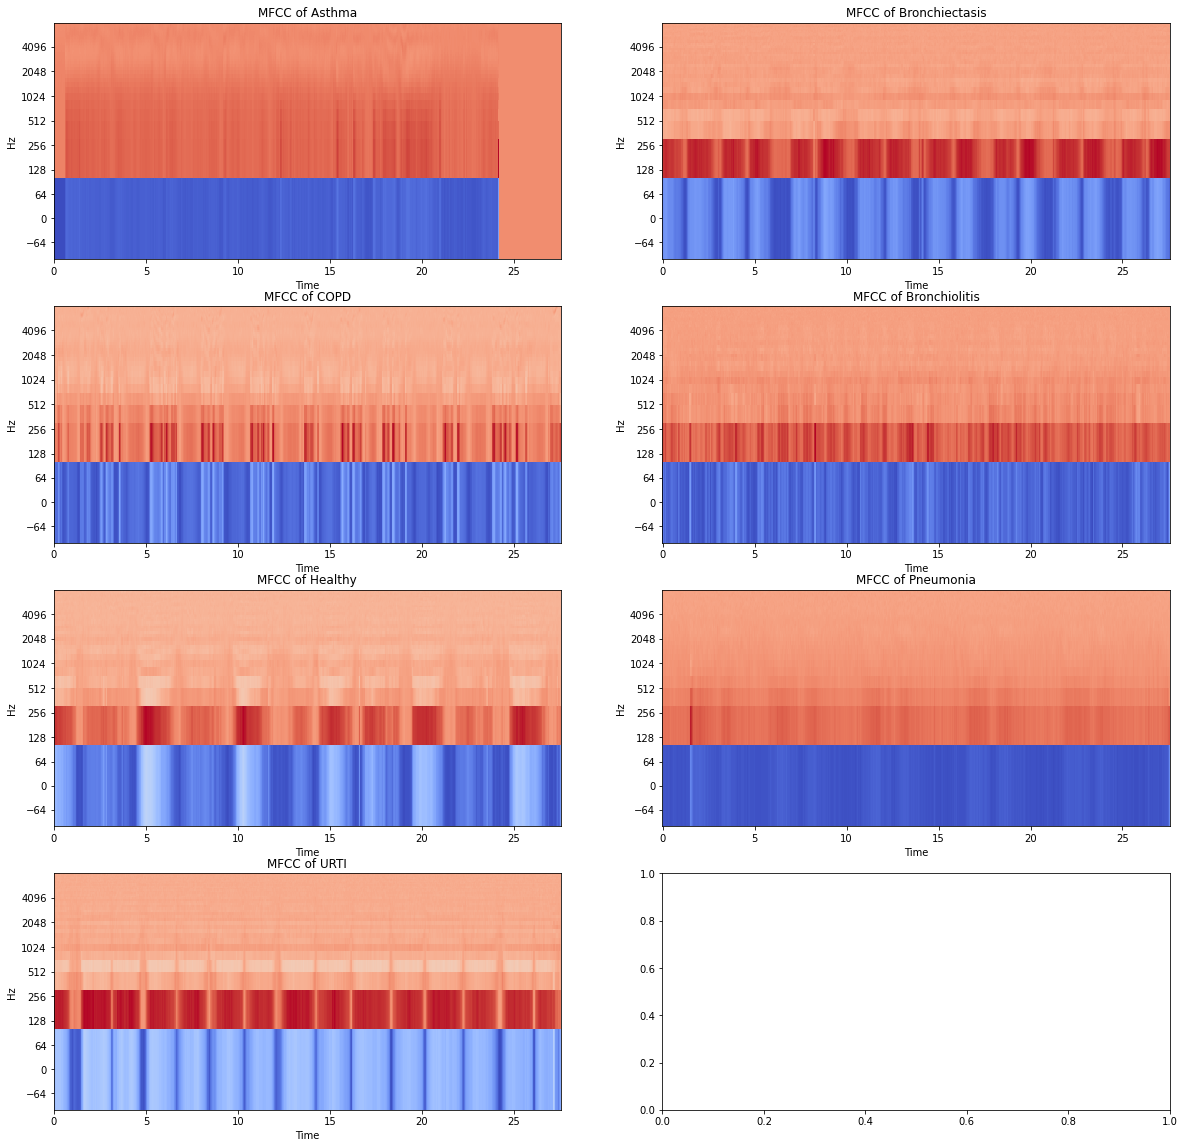

In [15]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))

librosa.display.specshow(extract_features(filepath_Asthma), x_axis='time',
                         y_axis='log', sr=sr_new,ax=ax[0,0])
ax[0,0].set(title='MFCC of Asthma')

librosa.display.specshow(extract_features(filepath_Bronchiectasis), x_axis='time',
                         y_axis='log', sr=sr_new, ax=ax[0,1])
ax[0,1].set(title='MFCC of Bronchiectasis')

librosa.display.specshow(extract_features(filepath_COPD), x_axis='time',
                         y_axis='log', sr=sr_new,ax=ax[1,0])
ax[1,0].set(title='MFCC of COPD')

librosa.display.specshow(extract_features(filepath_Bronchiolitis), x_axis='time',
                         y_axis='log', sr=sr_new,ax=ax[1,1])
ax[1,1].set(title='MFCC of Bronchiolitis')

librosa.display.specshow(extract_features(filepath_Healthy), x_axis='time',
                         y_axis='log', sr=sr_new,ax=ax[2,0])
ax[2,0].set(title='MFCC of Healthy')

librosa.display.specshow(extract_features(filepath_Pneumonia), x_axis='time',
                         y_axis='log', sr=sr_new,ax=ax[2,1])
ax[2,1].set(title='MFCC of Pneumonia')

librosa.display.specshow(extract_features(filepath_URTI), x_axis='time',
                         y_axis='log', sr=sr_new,ax=ax[3,0])
ax[3,0].set(title='MFCC of URTI')

In [16]:
features = np.array(features) # convert to numpy array

In [17]:
# delete the very rare diseases
features1 = np.delete(features, np.where((labels == 'LRTI'))[0], axis=0) 

labels1 = np.delete(labels, np.where((labels == 'LRTI'))[0], axis=0)

In [18]:
# print class counts
unique_elements, counts_elements = np.unique(labels1, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[['Asthma' 'Bronchiectasis' 'Bronchiolitis' 'COPD' 'Healthy' 'Pneumonia'
  'URTI']
 ['33' '16' '13' '793' '35' '37' '23']]


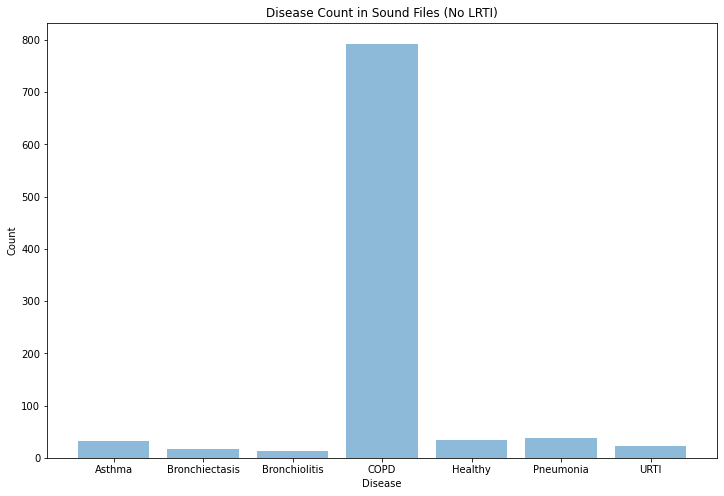

In [19]:
# plot class counts
y_pos = np.arange(len(unique_elements))
plt.figure(figsize=(12,8))
plt.bar(unique_elements, counts_elements, align='center', alpha=0.5)
plt.xticks(y_pos, unique_elements)
plt.ylabel('Count')
plt.xlabel('Disease')
plt.title('Disease Count in Sound Files (No LRTI)')
plt.show()

In [22]:
# One-hot encode labels
from keras.utils import to_categorical
le = LabelEncoder()
i_labels = le.fit_transform(labels1)
oh_labels = to_categorical(i_labels) 

In [21]:
pip install keras-utils

Note: you may need to restart the kernel to use updated packages.


# Apply CNN Algorithm on Dataset

In [23]:
# add channel dimension for CNN
features1 = np.reshape(features1, (*features1.shape,1)) 

In [24]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(features1, oh_labels, stratify=oh_labels, 
                                                    test_size=0.2, random_state = 42)

In [25]:
num_rows = 40
num_columns = 862
num_channels = 1

num_labels = oh_labels.shape[1]
filter_size = 2

# Construct model 
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=filter_size,
                 input_shape=(num_rows, num_columns, num_channels), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=filter_size, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=filter_size, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=128, kernel_size=filter_size, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(GlobalAveragePooling2D())

model.add(Dense(num_labels, activation='softmax')) 

In [26]:
# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 

In [27]:
# Display model architecture summary 
model.summary()

# Calculate pre-training accuracy 
score = model.evaluate(x_test, y_test, verbose=1)
accuracy = 100*score[1]

#print("Pre-training accuracy: %.4f%%" % accuracy)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 39, 861, 16)       80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 19, 430, 16)       0         
_________________________________________________________________
dropout (Dropout)            (None, 19, 430, 16)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 18, 429, 32)       2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 214, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 9, 214, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 213, 64)        8

In [28]:
# train model
num_epochs = 200
num_batch_size = 128

callbacks = [
    ModelCheckpoint(
        filepath='mymodel2_{epoch:02d}.h5',
        # Path where to save the model
        # The two parameters below mean that we will overwrite
        # the current checkpoint if and only if
        # the `val_accuracy` score has improved.
        save_best_only=True,
        monitor='val_accuracy',
        verbose=1)
]
start = datetime.now()

history=model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs,
          validation_data=(x_test, y_test), callbacks=callbacks, verbose=1)
duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/200
6/6 [==============================] - ETA: 0s - loss: 6.1411 - accuracy: 0.6855
Epoch 00001: val_accuracy improved from -inf to 0.04211, saving model to mymodel2_01.h5
6/6 [==============================] - 8s 1s/step - loss: 6.1411 - accuracy: 0.6855 - val_loss: 4.4745 - val_accuracy: 0.0421
Epoch 2/200
6/6 [==============================] - ETA: 0s - loss: 4.1334 - accuracy: 0.6842
Epoch 00002: val_accuracy improved from 0.04211 to 0.83684, saving model to mymodel2_02.h5
6/6 [==============================] - 8s 1s/step - loss: 4.1334 - accuracy: 0.6842 - val_loss: 1.6836 - val_accuracy: 0.8368
Epoch 3/200
6/6 [==============================] - ETA: 0s - loss: 3.2550 - accuracy: 0.8158
Epoch 00003: val_accuracy did not improve from 0.83684
6/6 [==============================] - 8s 1s/step - loss: 3.2550 - accuracy: 0.8158 - val_loss: 1.3688 - val_accuracy: 0.8368
Epoch 4/200
6/6 [==============================] - ETA: 0s - loss: 2.2965 - accuracy: 0.7855
Epoch 00004: val

KeyboardInterrupt: 

In [52]:
# Evaluating the model on the training and testing set
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.99210524559021
Testing Accuracy:  0.8947368264198303


In [53]:
preds = model.predict(x_test) # label scores 

classpreds = np.argmax(preds, axis=1) # predicted classes 

y_testclass = np.argmax(y_test, axis=1) # true classes

n_classes=7 # number of classes

In [54]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], preds[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

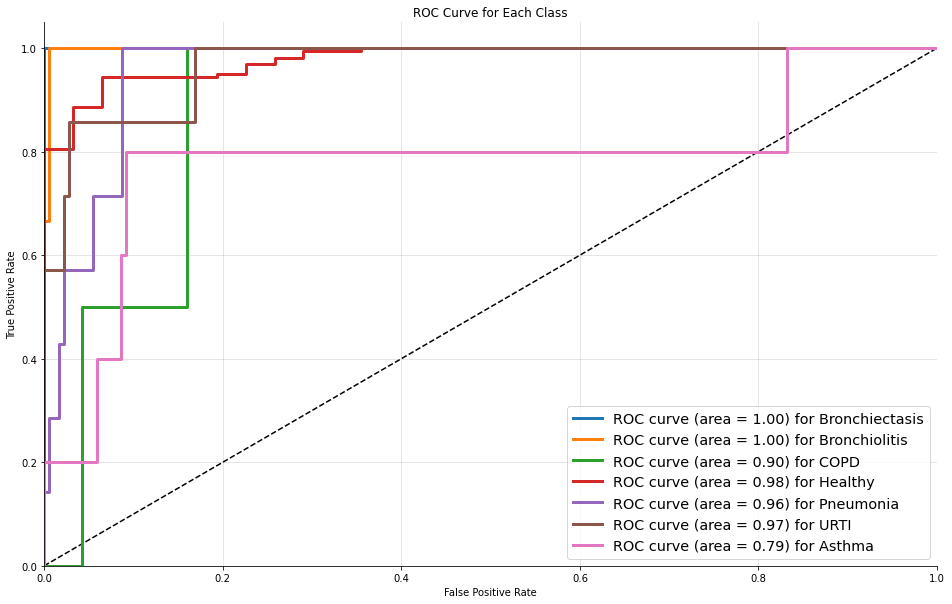

In [55]:
c_names = ['Bronchiectasis', 'Bronchiolitis', 'COPD', 'Healthy', 'Pneumonia', 'URTI','Asthma']
# Plot ROC curves
fig, ax = plt.subplots(figsize=(16, 10))
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve for Each Class')
for i in range(n_classes):
    ax.plot(fpr[i], tpr[i], linewidth=3, label='ROC curve (area = %0.2f) for %s' % (roc_auc[i], c_names[i]))
ax.legend(loc="best", fontsize='x-large')
ax.grid(alpha=.4)
sns.despine()
plt.show()


In [56]:
# Classification Report
print(classification_report(y_testclass, classpreds, target_names=c_names))

                precision    recall  f1-score   support

Bronchiectasis       0.88      1.00      0.93         7
 Bronchiolitis       0.67      0.67      0.67         3
          COPD       0.00      0.00      0.00         2
       Healthy       0.95      0.97      0.96       159
     Pneumonia       0.50      0.29      0.36         7
          URTI       0.67      0.57      0.62         7
        Asthma       0.25      0.20      0.22         5

      accuracy                           0.89       190
     macro avg       0.56      0.53      0.54       190
  weighted avg       0.89      0.89      0.89       190



In [57]:
# Confusion Matrix
print(confusion_matrix(y_testclass, classpreds))

[[  7   0   0   0   0   0   0]
 [  0   2   0   1   0   0   0]
 [  0   0   0   0   1   0   1]
 [  0   1   1 154   1   1   1]
 [  0   0   1   3   2   0   1]
 [  0   0   0   3   0   4   0]
 [  1   0   1   1   0   1   1]]


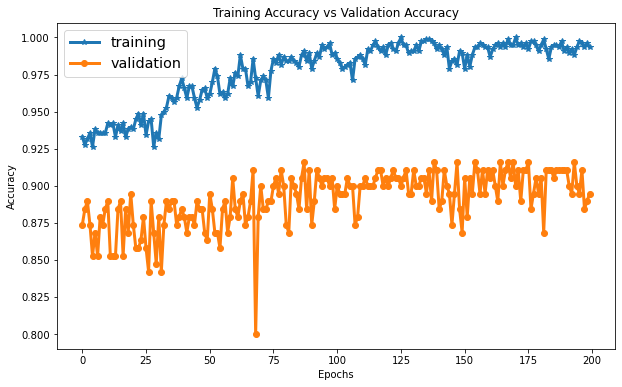

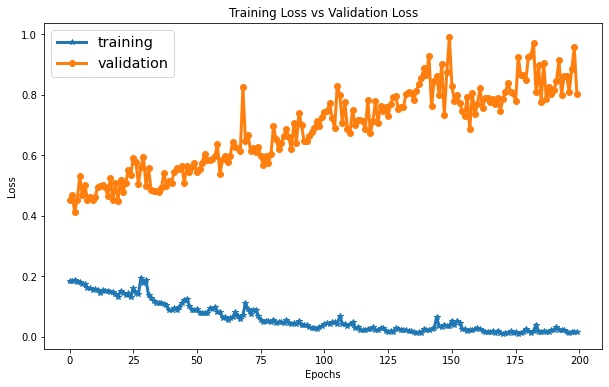

In [58]:
def visualize_training(history, lw = 3):
    plt.figure(figsize=(10,6))
    plt.plot(history.history['accuracy'], label = 'training', marker = '*', linewidth = lw)
    plt.plot(history.history['val_accuracy'], label = 'validation', marker = 'o', linewidth = lw)
    plt.title('Training Accuracy vs Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(fontsize = 'x-large')
    plt.show()

    plt.figure(figsize=(10,6))
    plt.plot(history.history['loss'], label = 'training', marker = '*', linewidth = lw)
    plt.plot(history.history['val_loss'], label = 'validation', marker = 'o', linewidth = lw)
    plt.title('Training Loss vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(fontsize = 'x-large')
    plt.show()
visualize_training(history)

                precision    recall  f1-score   support

          COPD       0.88      1.00      0.93         7
       Healthy       0.67      0.67      0.67         3
          URTI       0.00      0.00      0.00         2
Bronchiectasis       0.95      0.97      0.96       159
     Pneumoina       0.50      0.29      0.36         7
 Bronchiolitis       0.67      0.57      0.62         7
        Asthma       0.25      0.20      0.22         5

      accuracy                           0.89       190
     macro avg       0.56      0.53      0.54       190
  weighted avg       0.89      0.89      0.89       190



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

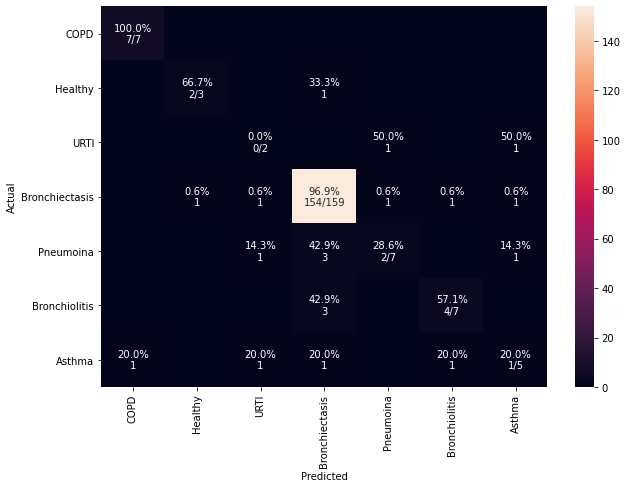

In [60]:
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
matrix_index = ["COPD", "Healthy", "URTI", "Bronchiectasis", "Pneumoina", "Bronchiolitis","Asthma"]

preds = model.predict(x_test)
classpreds = np.argmax(preds, axis=1) # predicted classes 
y_testclass = np.argmax(y_test, axis=1) # true classes

cm = confusion_matrix(y_testclass, classpreds)
print(classification_report(y_testclass, classpreds, target_names=matrix_index))

# Get percentage value for each element of the matrix
cm_sum = np.sum(cm, axis=1, keepdims=True)
cm_perc = cm / cm_sum.astype(float) * 100
annot = np.empty_like(cm).astype(str)
nrows, ncols = cm.shape
for i in range(nrows):
    for j in range(ncols):
        c = cm[i, j]
        p = cm_perc[i, j]
        if i == j:
            s = cm_sum[i]
            annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
        elif c == 0:
            annot[i, j] = ''
        else:
            annot[i, j] = '%.1f%%\n%d' % (p, c)


# Display confusion matrix 
df_cm = pd.DataFrame(cm, index = matrix_index, columns = matrix_index)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(df_cm, annot=annot, fmt='')

In [ ]:
class ExportModel(tf.Module):
  def __init__(self, model):
    self.model = model

    # Accept either a string-filename or a batch of waveforms.
    # YOu could add additional signatures for a single wave, or a ragged-batch. 
    self.__call__.get_concrete_function(
        x=tf.TensorSpec(shape=(), dtype=tf.string))
    self.__call__.get_concrete_function(
       x=tf.TensorSpec(shape=[None, 16000], dtype=tf.float32))


  @tf.function
  def __call__(self, x):
    # If they pass a string, load the file and decode it. 
    if x.dtype == tf.string:
      x = tf.io.read_file(x)
      x, _ = tf.audio.decode_wav(x, desired_channels=1, desired_samples=16000,)
      x = tf.squeeze(x, axis=-1)
      x = x[tf.newaxis, :]

    x = get_spectrogram(x)  
    result = self.model(x, training=False)

    class_ids = tf.argmax(result, axis=-1)
    class_names = tf.gather(label_names, class_ids)
    return {'predictions':result,
            'class_ids': class_ids,
            'class_names': class_names}